In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


##### We already get the processed comments in the previous coding, so here we use the documents directly.

In [2]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
df = pd.read_csv("/content/drive/My Drive/NLP/processed.csv",sep = ",")
arr = df["processed_comments"]
lab = df["label"]
X_train, x_test, Y_train, y_test  = train_test_split(arr, lab, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1)

import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/My Drive/NLP/processed.csv")
arr = np.array(df["processed_comments"])
lab = np.array(df["label"])

x_train, x_test, y_train, y_test  = train_test_split(arr, lab, test_size=0.1, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size= 0.15, random_state =1)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(11411,)
(11411,)
(3804,)
(3804,)
(3804,)
(3804,)


# Vocabulary Dataset Preparation

In [4]:
from collections import Counter
# turn a doc into clean tokens
def clean_doc(tokens, doc):
 # split into tokens by white space
 sentence = doc.split()
 # remove remaining tokens that are not alphabetic
  # filter out short tokens
 for word in sentence:
   if word.isalpha() and len(word)>1:
     tokens.append(word)
 return tokens

tokens = []
x_train_lst = list(x_train)
for i in x_train_lst:
  tokens = clean_doc(tokens,str(i))

# define vocab
vocab = Counter()
vocab.update(tokens)
# print the size of the vocab
print("the RateMyProfessor Comments vocabulary includes %d words"%len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

the RateMyProfessor Comments vocabulary includes 12628 words
[('the', 14569), ('and', 14364), ('to', 11902), ('you', 10283), ('is', 10132), ('class', 8427), ('he', 7961), ('of', 6136), ('she', 5799), ('in', 5081), ('but', 4859), ('very', 4405), ('his', 4003), ('her', 3956), ('not', 3872), ('for', 3801), ('if', 3679), ('it', 3584), ('are', 3380), ('on', 3075), ('this', 2968), ('was', 2964), ('that', 2590), ('with', 2562), ('take', 2557), ('have', 2547), ('do', 2476), ('teacher', 2423), ('professor', 2337), ('be', 2282), ('an', 2241), ('will', 2176), ('so', 2098), ('at', 2069), ('about', 2053), ('great', 2019), ('easy', 2017), ('really', 1990), ('as', 1961), ('him', 1954), ('all', 1871), ('good', 1814), ('your', 1674), ('students', 1633), ('had', 1580), ('hard', 1542), ('tests', 1526), ('what', 1515), ('get', 1427), ('dont', 1398)]


##### To decrease the influence of low-frequent words, we set the min occurrence as 2, and eliminate some words in the original dictionary

In [5]:
# keep tokens with a min occurrence
min_occur = 2
tokens1 = [k for k,c in vocab.items() if c >= min_occur]
print(len(tokens1))

6496


# Train Embedding Layer

In [6]:
def clean_doc(doc, vocab):
 # split into tokens by white space
 tokens = doc.split()
 # filter out tokens not in vocab
 tokens = [w for w in tokens if w in vocab]
 tokens = ' '.join(tokens)
 return tokens

x_train_cl = []
for i in x_train:
  tokens = clean_doc(str(i), tokens1)
  x_train_cl.append(tokens)


In [7]:
x_test_cl = []
for i in x_test:
  tokens2 = clean_doc(str(i),tokens1)
  x_test_cl.append(tokens2)
print(x_test_cl[:100])

['although im not receiving bad grade at the moment cannot deny that she is not the greatest of teachers she skips over some things in class and her assignments occasionally will cover things she did not discuss make sure you go over her review guides and do the reading and the homework otherwise youll probably fail go to the tutors', 'problem is he treats students like intelligent adults and at most arent', 'can recommend him if you just want to pass but if you need to get and you are not good at speaking in front of ppl wont recommend him he is tolerant to pass but intolerant to give he is always smiley and looks easygoing but the professor who needs result not process overall like him but regret took his class', 'great professor hell keep you interested even if youre not excited about environmental stuff', 'had him for spanish and he comes off as arrogant he likes to about his education and his successful friends try to pay attention to the things he emphasizes as they show up on th

In [8]:
x_val_cl = []
for i in x_val:
  tokens3 = clean_doc(str(i),tokens1)
  x_val_cl.append(tokens3)
print(x_val_cl[:100])

['this man is amazing wisdom love at first thats all have to say wish could take chinese for the rest of my life oh and he tells the absolutely best jokes', 'really awesome and interesting teacher and dont even like math', 'defiantly the best professor ive had for gen chem but the class is still hard got an using study edge they really help to explain and emphasize the most important things talham goes over recommend going to the weekly review sessions with study edge made huge difference when it came to the exams', 'he was very helpful very interested in your own opinions and those of the class he was good at trying to find your strong point and you based on what you do best and what you tried to improve because of him', 'hard class for the graduate students even more for the horrible book both book and gao expected lot of prior knowledge but hes very helpful as long as you ask go to his office or ask him in class good luck', 'hes extremely nice and follows the powerpoint well he expl

In [9]:
from string import punctuation
from os import listdir
from numpy import array
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from keras import backend as K

# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(x_train_cl)
 
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(x_train_cl)
# pad sequences
max_length = max([len(s.split()) for s in x_train_cl])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
 
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(x_test_cl)
# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# sequence encode
encoded_docs = tokenizer.texts_to_sequences(x_val_cl)
# pad sequences
Xval = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
 
 
# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1
# define model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
# compile network
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
K.set_value(model.optimizer.learning_rate, 0.001)
history = model.fit(Xtrain, y_train, epochs=10, verbose=2,shuffle = True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 129, 100)          649700    
                                                                 
 conv1d (Conv1D)             (None, 122, 32)           25632     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 61, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1952)              0         
                                                                 
 dense (Dense)               (None, 10)                19530     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                        

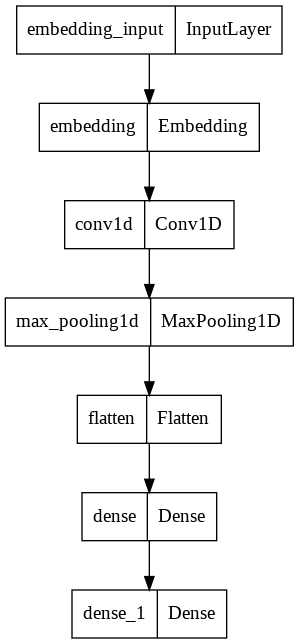

In [10]:
tf.keras.utils.plot_model(model,to_file="model.png")

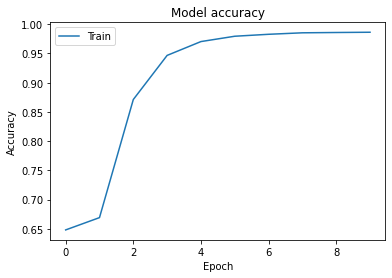

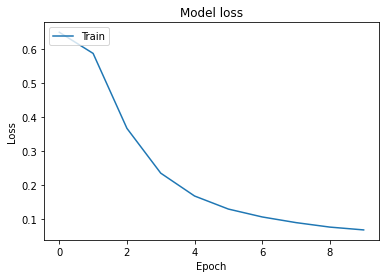

In [ ]:
import matplotlib.pyplot as plt
# model training & testing accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# model training & testing loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
y_predicted = model.predict(Xtest)
# evaluate
loss, acc = model.evaluate(Xtest, y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

119/119 [==============================] - 1s 7ms/step
Test Accuracy: 56.125134
